<a href="https://colab.research.google.com/github/muhamadrefo/Diare/blob/main/Diare_v_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content/drive/MyDrive/Dataset/Diarrhea
%ls

/content/drive/MyDrive/Dataset/Diarrhea
 cos1.dot     Diare.csv   golf_df.csv               search3.csv   tree3.dot
 cusdm1.csv   dm01.csv   'Laporan Diare 2019.xls'   search4.csv   tree4.dot
 cusdm2.csv   dm02.csv    savecsv.csv               search.csv    tree.dot
 cusdm3.csv   dm03.csv    search2.csv               tree2.dot


In [53]:
import csv
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from graphviz import Source
import matplotlib.pyplot as plt
from collections import Counter
from warnings import simplefilter
from sklearn.tree import export_text
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from IPython.display import display, SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#ignore all future warning
simplefilter(action='ignore', category=FutureWarning)
da= pd.read_csv('Diare.csv')
da.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,495,500,500,500,491,504,500,496,504
unique,2,2,2,2,2,2,2,3,2
top,Tidak,Ya,Tidak,Ya,Tidak,Ya,Ya,Berlendir,Akut
freq,432,310,258,271,460,303,407,214,473


dm01{
  Akut: 25,
  Kronis: 5,
  Perbandingan 5:1
}

dm02{
  Akut: 23,
  Kronis: 7,
  Perbandingan 3:1
}

dm03{
  Akut: 15,
  Kronis: 15,
  Perbandingan 1:1
}

In [54]:
dm01 = pd.read_csv('dm01.csv')
dm01.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,30,30,30,30,30,30,30,30,30
unique,2,2,2,2,2,2,2,3,2
top,Tidak,Ya,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Akut
freq,23,21,18,17,25,23,23,11,25


In [55]:
dm02 = pd.read_csv('dm02.csv')
dm02.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,30,30,30,30,30,30,30,30,30
unique,2,2,2,2,2,2,2,3,2
top,Tidak,Ya,Tidak,Ya,Tidak,Ya,Ya,Berdarah,Akut
freq,22,22,16,20,23,20,23,12,23


In [56]:
dm03 = pd.read_csv('dm03.csv')
dm03.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,30,30,30,30,30,30,30,30,30
unique,2,2,2,2,2,2,2,3,2
top,Ya,Ya,Ya,Ya,Ya,Ya,Ya,Tidak,Kronis
freq,16,25,17,19,15,22,27,12,15


In [57]:
dm04 = pd.read_csv('golf_df.csv')
dm04.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,normal,False,yes
freq,5,6,7,8,9


Jumlah missing data:  23 



Text(0, 0.5, 'Frekuensi')

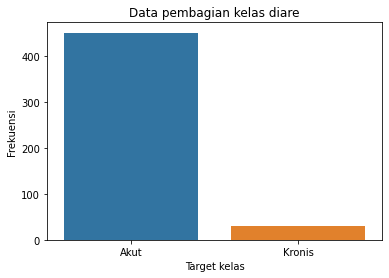

In [58]:
#drop missing data
data = da.dropna()
print('Jumlah missing data: ', (len(da)-len(data)),'\n')

# renaming column each dataset
data = data.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})
dm1 = dm01.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})
dm2 = dm02.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})
dm3 = dm03.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})

#Check pembagian tiap target class untuk tiap dataset
sns.countplot(x = data['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

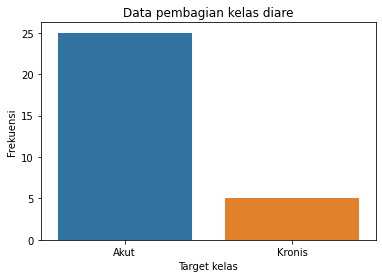

In [59]:
sns.countplot(x = dm1['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

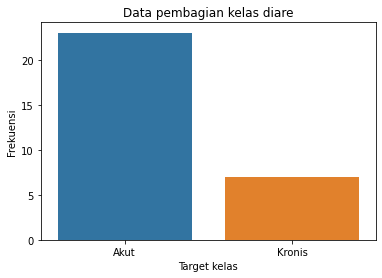

In [60]:
sns.countplot(x = dm2['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

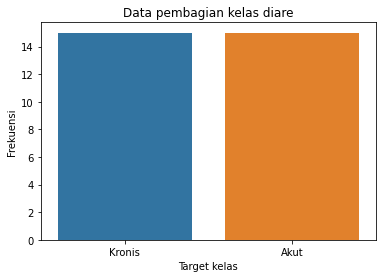

In [61]:
sns.countplot(x = dm3['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

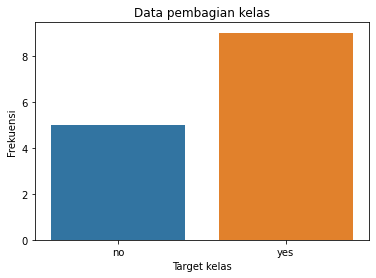

In [62]:
sns.countplot(x = dm04['Play'])
plt.title('Data pembagian kelas')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

In [63]:
#Encode using LabelEncoder
le = LabelEncoder()
data = data.apply(le.fit_transform)
dm1 = dm1.apply(le.fit_transform)
dm2 = dm2.apply(le.fit_transform)
dm3 = dm3.apply(le.fit_transform)
dm4 = dm04.apply(le.fit_transform)

In [64]:
dm1

,Demam,Muntah,MK,Nyeri,BAB_1,BAB_2,FE,FBoB,Diare
0,0,1,0,0,0,0,1,1,0
1,1,1,1,0,1,1,1,0,1
2,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,1,0
5,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,1,1,0,0
7,0,1,1,1,0,1,1,1,0
8,0,0,0,0,0,1,1,2,0
9,0,0,1,0,0,1,1,1,0


# Learn model

In [65]:
clf= DecisionTreeClassifier(criterion='gini')
X = data.drop(columns='Diare')
y = data['Diare']

def normal():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def over():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def under():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=8)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)


def golf():
  #Splitting data train and test
  X = dm4.drop(columns='Play')
  y = dm4['Play']
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=8)
  print(Counter(y_train),'\n')

  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)


Counter({0: 359, 1: 26}) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00         5

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



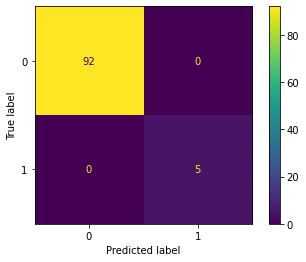

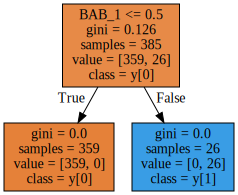



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [66]:
normal()

Counter({0: 451, 1: 451})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        91

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



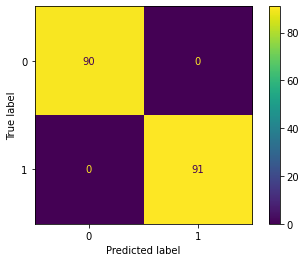

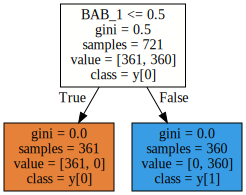



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [67]:
over()

Counter({0: 31, 1: 31})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



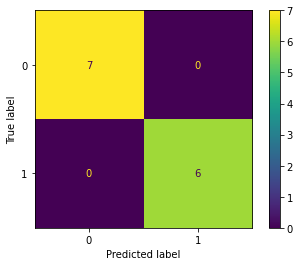

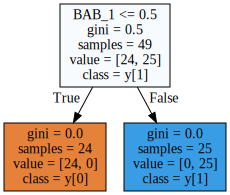



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [68]:
under()

Counter({1: 7, 0: 4}) 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



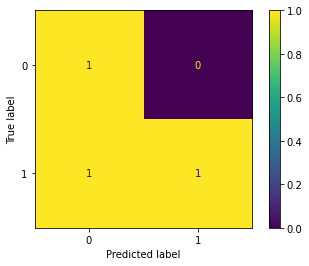

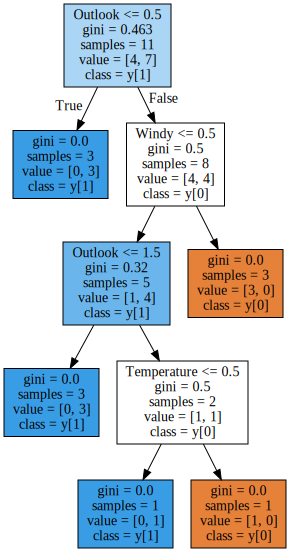



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 0



In [69]:
golf()

# Using Dummy-01 dataset

In [70]:
clf= DecisionTreeClassifier(criterion='gini')
Xdm1 = dm1.drop(columns='Diare')
ydm1 = dm1['Diare']

def normaldum1():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(Xdm1,ydm1, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm1.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def overdum1():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(Xdm1,ydm1)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm1.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def underdum1():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(Xdm1,ydm1)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=10)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm1.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({0: 21, 1: 3}) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



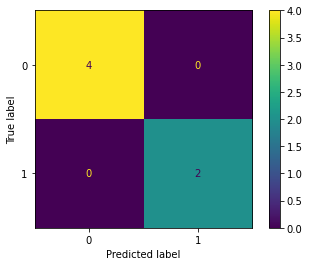

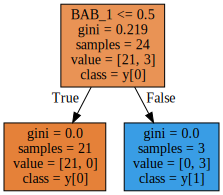



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [71]:
normaldum1()

Counter({0: 25, 1: 25})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



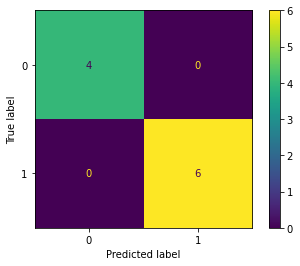

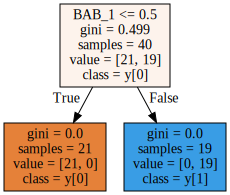



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [72]:
overdum1()

Counter({0: 5, 1: 5})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



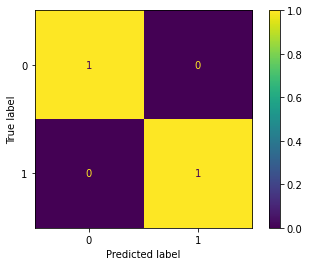

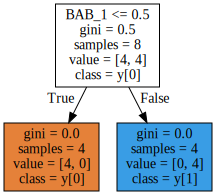



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [101]:
underdum1()

# Using Dummy-02 dataset

In [74]:
clf= DecisionTreeClassifier(criterion='gini')
Xdm2 = dm2.drop(columns='Diare')
ydm2 = dm2['Diare']

def normaldum2():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(Xdm2,ydm2, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm2.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def overdum2():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(Xdm2,ydm2)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm2.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def underdum2():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(Xdm2,ydm2)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=10)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm2.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({0: 18, 1: 6}) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



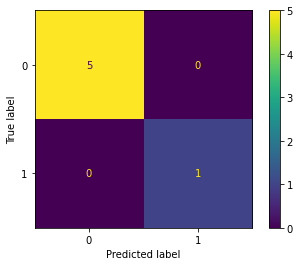

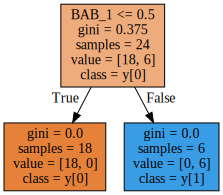



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [75]:
normaldum2()

Counter({0: 23, 1: 23})
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



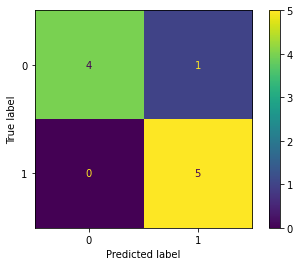

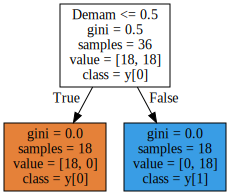



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [76]:
overdum2()

Counter({0: 7, 1: 7})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



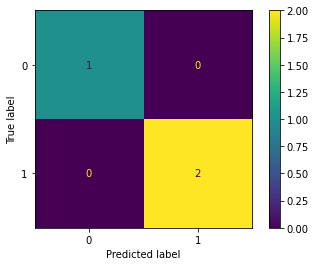

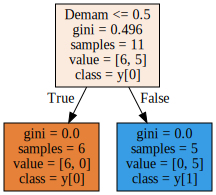



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [77]:
underdum2()

# Using Dummy-03 dataset

In [78]:
clf= DecisionTreeClassifier(criterion='gini')
Xdm3 = dm3.drop(columns='Diare')
ydm3 = dm3['Diare']

def normaldum3():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(Xdm2,ydm3, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm3.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def overdum3():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(Xdm3,ydm3)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm3.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def underdum3():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(Xdm3,ydm3)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=10)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xdm3.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({0: 18, 1: 6}) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



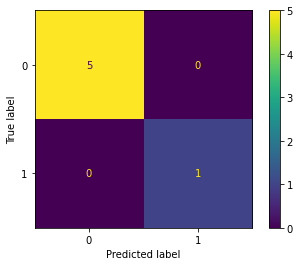

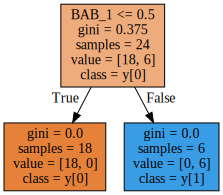



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [79]:
normaldum2()

Counter({0: 23, 1: 23})
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



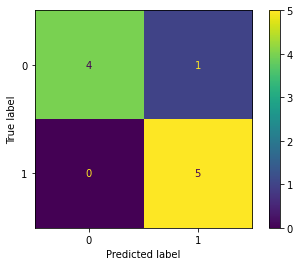

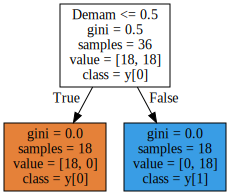



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [80]:
overdum2()

Counter({0: 7, 1: 7})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



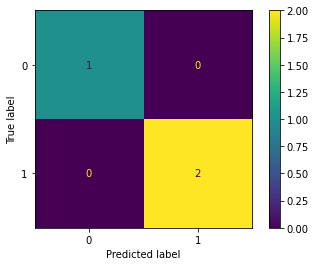

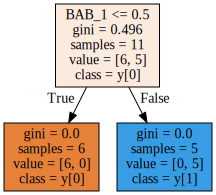



|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- class: 1



In [81]:
underdum2()

# Using Dummy-custom dataset

In [82]:
cusdm1 = pd.read_csv('cusdm1.csv')
cusdm1.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari Lainnya minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,30,30,30,30,30,30,30,30,30
unique,2,2,2,2,3,3,3,3,2
top,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Akut
freq,23,21,18,17,13,12,10,11,25


In [83]:
cusdm2 = pd.read_csv('cusdm2.csv')
cusdm2.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari Lainnya minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,30,30,30,30,30,30,30,30,30
unique,2,2,2,2,3,3,3,3,2
top,Tidak,Ya,Tidak,Ya,Tidak,Lainnya,Ya,Berdarah,Akut
freq,22,22,16,20,14,14,14,12,23


In [84]:
cusdm3 = pd.read_csv('cusdm3.csv')
cusdm3.describe()

,Demam,Muntah,Mulut Kering,Nyeri di Perut,BAB lebih dari Lainnya minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,30,30,30,30,30,30,30,30,30
unique,2,2,2,2,3,3,3,3,2
top,Ya,Ya,Ya,Ya,Lainnya,Ya,Tidak,Tidak,Kronis
freq,16,25,17,19,12,11,11,12,15


In [85]:
cus1 = cusdm1.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})
cus2 = cusdm2.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})
cus3 = cusdm3.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})

cus1 = cus1.apply(le.fit_transform)
cus2 = cus2.apply(le.fit_transform)
cus3 = cus3.apply(le.fit_transform)

In [86]:
cus1

,Demam,Muntah,MK,Nyeri,BAB lebih dari Lainnya minggu,BAB_2,FE,FBoB,Diare
0,0,1,0,0,0,1,2,1,0
1,1,1,1,0,1,2,0,0,1
2,0,1,0,1,1,0,1,1,0
3,0,0,0,0,1,2,1,0,0
4,0,1,1,0,0,1,1,1,0
5,0,0,0,0,2,1,1,0,0
6,0,0,0,1,2,2,0,0,0
7,0,1,1,1,1,1,1,1,0
8,0,0,0,0,2,0,2,2,0
9,0,0,1,0,0,0,1,1,0


# learning model from custom dummy-01

In [87]:
clf= DecisionTreeClassifier(criterion='gini')
Xcus1 = cus1.drop(columns='Diare')
ycus1 = cus1['Diare']

def normalcus1():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(Xcus1,ycus1, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus1.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def overcus1():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(Xcus1,ycus1)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus1.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def undercus1():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(Xcus1,ycus1)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=10)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus1.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({0: 21, 1: 3}) 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



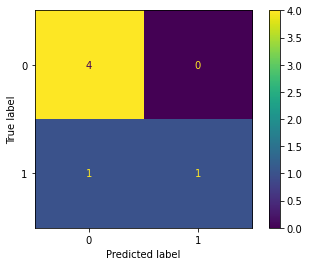

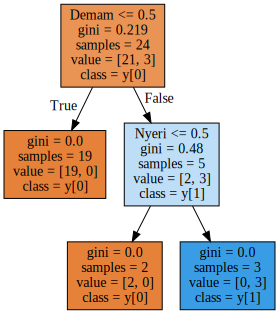



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1



In [88]:
normalcus1()

Counter({0: 25, 1: 25})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



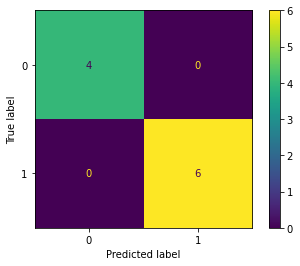

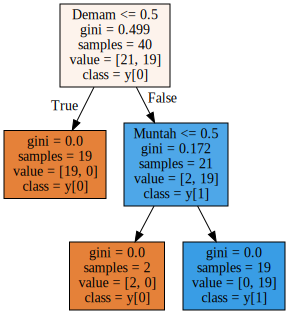



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1



In [89]:
overcus1()

Counter({0: 5, 1: 5})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



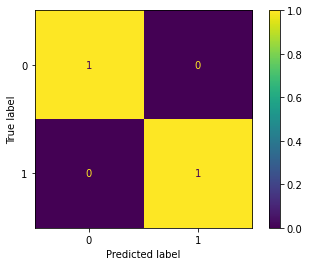

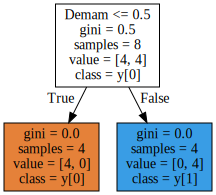



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [90]:
undercus1()

# learning model from custom dummy-02

In [91]:
clf= DecisionTreeClassifier(criterion='gini')
Xcus2 = cus2.drop(columns='Diare')
ycus2 = cus2['Diare']

def normalcus2():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(Xcus2,ycus2, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus2.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def overcus2():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(Xcus2,ycus2)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus2.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def undercus2():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(Xcus2,ycus2)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=10)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus2.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({0: 18, 1: 6}) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



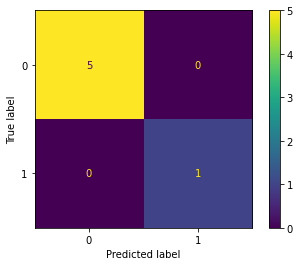

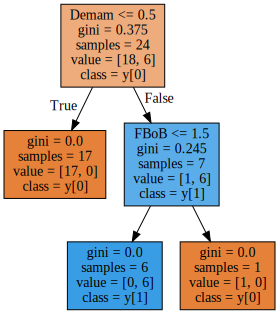



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_7 <= 1.50
|   |   |--- class: 1
|   |--- feature_7 >  1.50
|   |   |--- class: 0



In [103]:
normalcus2()

Counter({0: 23, 1: 23})
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



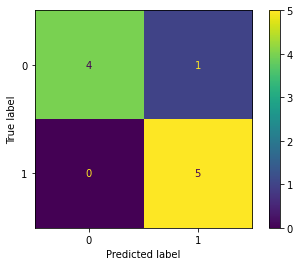

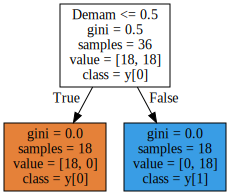



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [93]:
overcus2()

Counter({0: 7, 1: 7})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



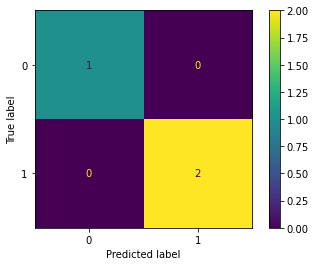

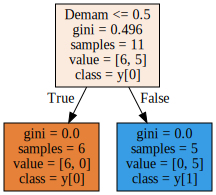



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [94]:
undercus2()

# learning model from custom dummy-03

In [95]:
clf= DecisionTreeClassifier(criterion='gini')
Xcus3 = cus3.drop(columns='Diare')
ycus3 = cus3['Diare']

def normalcus3():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(Xcus3,ycus3, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus3.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def overcus3():
  #get balanced data sample also splitting data train and test
  ros = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = ros.fit_resample(Xcus3,ycus3)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_over))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus3.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

def undercus3():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(Xcus3,ycus3)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state=10)
  print(Counter(y_under))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=Xcus3.columns, class_names=True,
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

Counter({1: 13, 0: 11}) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



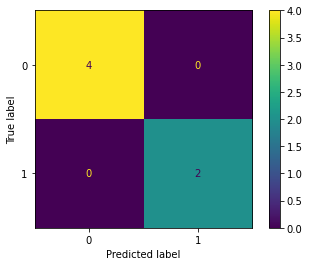

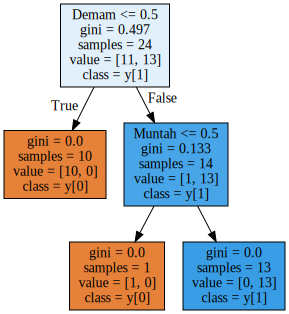



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1



In [96]:
normalcus3()

Counter({1: 15, 0: 15})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



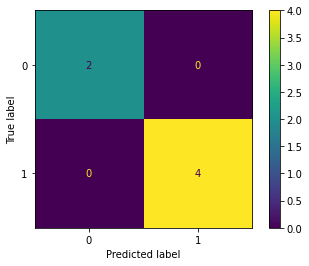

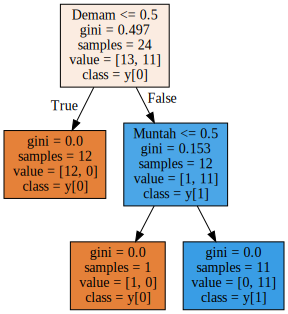



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1



In [104]:
overcus3()

Counter({0: 15, 1: 15})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



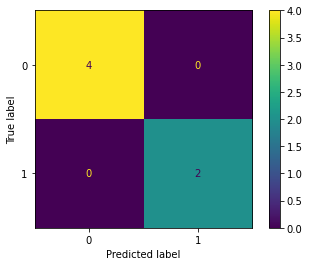

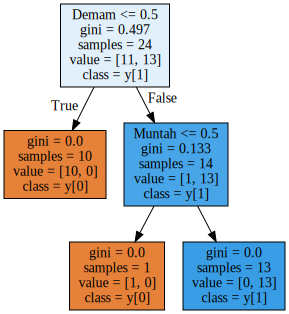



|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1



In [98]:
undercus3()